<a href="https://colab.research.google.com/github/Eleemon98/JDF/blob/main/0417_WebNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### 해당 검색어와 연관깊은 단어 찾기
##### 해당 검색어의 기사 언급량
##### 해당 기사와 유사한 기사 추천

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import requests

In [ ]:
driver = webdriver.Chrome()

In [ ]:
driver.get('https://www.naver.com')

In [ ]:
# 검색어 및 검색 기간 설정
search_word = "삼성전자"
start_date = "2024.04.10"
end_date = "2024.04.17"

base_url = f"https://search.naver.com/search.naver?where=news&query={search_word}&sm=tab_opt&sort=0&photo=3&field=0&pd=3&ds={start_date}&de={end_date}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{start_date.replace('.','')}to{end_date.replace('.','')}&is_sug_officeid=0&office_category=0&service_area=0"

In [ ]:
driver.get(base_url)

In [ ]:
# 스크롤 자동으로 내리기
for i in range(30):
    time.sleep(2)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

In [ ]:
# 뷰티풀숲으로 현재 페이지 크롤링
html = driver.page_source
# 파싱
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# 뉴스 본문 url과 뉴스 title 가져오기
title = [t.text for t in soup.select('a.news_tit')]
urls = soup.select('a.info')
url_naver = []

# 반복문을 사용해서 해당 title과 url정보만 파싱
for i in range(len(urls)):
    if 'naver' in urls[i]['href']:
        url_naver.append(urls[i]['href'])

In [ ]:
print(len(title), len(url_naver))

310 310


In [ ]:
res = requests.get(url_naver[0])
res

<Response [200]>

In [ ]:
## 제목 #title_area
## 작성일자 .media_end_head_info_datestamp_bunch >.media_end_head_info_datestamp_time
## 본문 #dic_area
soup = BeautifulSoup(res.text, 'html.parser')
main_title = soup.select_one('#title_area').text
main_title
date = soup.select_one('.media_end_head_info_datestamp_bunch >.media_end_head_info_datestamp_time').text
date
article = soup.select_one('#dic_area').text
article

'\n경계현, 현지 반도체 보조금 발표 행사 참석…JY는 불참“미국, 삼성 추가 투자로 현지 반도체 공급망 안정화할 것”첩단 칩 일부도 생산할 듯…”AI 수요 대응해 고객 확보”[이데일리 김응열 기자] 경계현 삼성전자 DS부문장 사장이 미국 정부의 반도체 보조금 발표 행사에 참석해 추가 투자 계획을 언급하면서 미국의 반도체 생태계 강화에 기여하겠다고 강조했다. 지역사회 발전에도 일조하겠다며 인공지능(AI)향 반도체 등의 생산에 적극 나서겠다고 예고했다.\n\n\n\n경계현(왼쪽 두 번째) 삼성전자 DS부문장 사장과 지나 러몬도 미국 상무부 장관(왼쪽 세 번째) 등 관계자들이 15일(현지시간) 미국 텍사스주 테일러시에서 열린 반도체 보조금 발표 행사에 참석해 기념사진을 찍고 있다. (사진=삼성전자 오스틴 사회관계망서비스 갈무리)16일 업계에 따르면 경 사장은 미 현지시간 기준 15일 오후 12시30분쯤 텍사스주 테일러시 삼성전자 테일러 캠퍼스에서 열린 삼성전자 반도체 보조금 발표 행사에 참석했다. 이 자리에는 지나 러몬도 미 상무부 장관과 아라티 프라바카 백악관 과학기술정책실장 등 미국 측 주요 인사가 참석했다. 참석 가능성이 점쳐진 이재용 삼성전자 회장과 조 바이든 미 대통령은 불참했다.행사에서 경 사장은 삼성전자의 미국내 추가 투자가 지역경제 성장과 일자리 창출에 기여할 것이라고 강조했다. 그는 “삼성 오스틴 반도체가 지역 경제에 미친 영향은 지난 2022년 136억달러에서 지난해 268억달러로 두 배 가까이 늘었다”며 “추가 투자는 지속적인 경제 성장과 일자리 창출 효과를 내고 지역과 국가 경제에 상당한 이점을 제공할 것”이라고 언급했다.삼성전자는 텍사스주 오스틴 지역에 파운드리(반도체 위탁생산) 공장을 운영하고 있다. 현재 테일러 공장을 새로 짓고 있는데 미국이 삼성전자에 반도체 투자 관련 직접 보조금 64억달러를 지급하기로 결정하면서 기존 투자액 170억달러에 280억달러를 추가해 총 450억달러를 쏟을 예정이다.또 경 사장은 “미국 고객의 수요를 충족

In [ ]:
main_title = []
date = []
article = []

for url in url_naver:
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    main_title.append(soup.select_one('#title_area').text)
    date.append(soup.select_one('.media_end_head_info_datestamp_bunch >.media_end_head_info_datestamp_time').text)
    article.append(soup.select_one('#dic_area').text)
    time.sleep(2)

In [ ]:
print(len(main_title), len(date), len(article))

310 310 310


In [ ]:
import pandas as pd
import numpy as np

news = {
    'date': date, 'title': main_title, 'article': article, 'url': url_naver
}

df = pd.DataFrame(news)
df.head()

,date,title,article,url
0,2024.04.16. 오후 1:32,경계현 삼성전자 사장 “美 반도체 공급망 강화에 기여”,"\n경계현, 현지 반도체 보조금 발표 행사 참석…JY는 불참“미국, 삼성 추가 투자...",https://n.news.naver.com/mnews/article/018/000...
1,2024.04.16. 오전 5:04,"삼성전자, 美 텍사스에 반도체 단지… 보조금 64억 달러 받는다",\n반도체 공장에 400억弗 이상 투자R&D·첨단 패키징 등 모두 수행인텔·TSMC...,https://n.news.naver.com/mnews/article/081/000...
2,2024.04.15. 오후 6:13,"""삼성은 TSMC와 다르다""…美 '보조금 9조' 초특급 대우",\n美 테일러 신공장에 400억달러 이상 투자삼성 美보조금 '현금 64억弗' 인텔·...,https://n.news.naver.com/mnews/article/015/000...
3,2024.04.15. 오후 7:11,"美, 삼성에 보조금 8.8조원 파격 지원",\n美에 최초로 첨단2나노 생산공장 설립지원 규모 인텔·TSMC 이어 세 번째바이든...,https://n.news.naver.com/mnews/article/022/000...
4,2024.04.15. 오후 2:01,"삼성·LG전자, 밀라노 디자인위크로…""가전, 인테리어가 되다""",\n(종합)\n\n\n\n밀라노 두오모 성당 옥외광고 전광판을 장식한 삼성 디자인 ...,https://n.news.naver.com/mnews/article/008/000...


In [ ]:
# 날짜 형식 맞춤
df['date'] = df['date'].apply(lambda x : x[:10])

In [ ]:
# 제목에 불필요한 기호 삭제
import re

p = re.compile("[ㄱ-ㅎㅏ-ㅣ가-힣 A-Za-z0-9]")

df['title'] = df['title'].apply(lambda x : ''.join(p.findall(x)))
df['title']

0                 경계현 삼성전자 사장  반도체 공급망 강화에 기여
1            삼성전자  텍사스에 반도체 단지 보조금 64억 달러 받는다
2                 삼성은 TSMC와 다르다 보조금 9조 초특급 대우
3                          삼성에 보조금 88조원 파격 지원
4                삼성LG전자 밀라노 디자인위크로가전 인테리어가 되다
                        ...                  
305                  삼성 GPU 강화미국인도서 개발자 동시 채용
306              수성이냐 탈환이냐이윤태 LX세미콘 DDI 경쟁 직면
307                      네이버인텔 AI 동맹 공동연구소 설립
308              사설 삼성 파운드리 견제 나선 TSMC의 공장 확대
309    엔비디아에 맞서 반격 나선 인텔 네이버와 AI 동맹 공동연구소 세운다
Name: title, Length: 310, dtype: object

In [ ]:
# 본문에 불필요한 기호 삭제
df['article'] = df['article'].apply(lambda x : ''.join(p.findall(x)))
df['article']

0      경계현 현지 반도체 보조금 발표 행사 참석JY는 불참미국 삼성 추가 투자로 현지 반...
1      반도체 공장에 400억 이상 투자RD첨단 패키징 등 모두 수행인텔TSMC 이어 세 ...
2       테일러 신공장에 400억달러 이상 투자삼성 보조금 현금 64억 인텔TSMC 압도하...
3      에 최초로 첨단2나노 생산공장 설립지원 규모 인텔TSMC 이어 세 번째바이든 한미동...
4      종합밀라노 두오모 성당 옥외광고 전광판을 장식한 삼성 디자인 전시 공존의 미래  사...
                             ...                        
305    삼성전자가 그래픽처리장치GPU 기술 역량 강화를 위해 미국과 인도에서 동시다발적으로...
306    LX세미콘 대전 캠퍼스이윤태 전 삼성전기 사장을 전격 영입한 LX세미콘이 도전과제에...
307    인텔 연례행사서 협력 공식화AI 전용 칩 가우디 활용 확대네이버 삼성과도 생태계 구...
308    미국 정부가 대만 TSMC에 보조금 66억달러와 저리 대출 50억달러 등 116억달...
309    인텔 기업용 생성형 AI 시장 전략 공개네이버와 협력AI 생태계 구축 위한 공동 연...
Name: article, Length: 310, dtype: object

In [ ]:
# 형태소 분석기로 품사 태깅
from konlpy.tag import Okt
okt = Okt()

res = okt.pos(df['title'][6])
res

[('삼성', 'Noun'),
 ('전자', 'Noun'),
 ('미국', 'Noun'),
 ('서', 'Josa'),
 ('보조금', 'Noun'),
 ('9조', 'Number'),
 ('땄지만', 'Verb'),
 ('현지', 'Noun'),
 ('반도체', 'Noun'),
 ('승기', 'Noun'),
 ('잡아야', 'Verb')]

In [ ]:
# 데이터 전처리 과정
tokenized_data = []
for i in range(len(df)):
    res = okt.pos(df['article'][i])
    temp = []
    for r in res:
        if r[1] == 'Noun' or r[1] == 'Alpha':
            temp.append(r[0])
    tokenized_data.append(temp)

In [ ]:
stop_word = ['통해', '지난', '이상', '업계', '대한', '위해', '추가', '가장', '삼성', '전자',
             '때문', '이후', '규모', '주요', '사장', '기자', '관련', '역시',
             '우리', '상황', '예상', '진행', '분야', '직원', '회사', '하락', '증가', '기존',
             '모두', '경우', '공개', '사진', '설명', '하량', '라며', '각각', '앞서', '대해',
             '가운데', '개월', '만큼']

In [ ]:
noun_alpha = sum(tokenized_data, [])
from collections import Counter
cw = []
for n in noun_alpha:
    if len(n) > 1 :
        if n not in stop_word:
            cw.append(n)

top_200_word = Counter(cw).most_common(200)
top_200_word

[('반도체', 1310),
 ('AI', 1237),
 ('미국', 1038),
 ('시장', 674),
 ('투자', 669),
 ('기업', 545),
 ('보조금', 458),
 ('디자인', 428),
 ('공장', 368),
 ('국내', 367),
 ('갤럭시', 365),
 ('제품', 356),
 ('기술', 352),
 ('생산', 339),
 ('정부', 327),
 ('가전', 314),
 ('지원', 307),
 ('지난해', 303),
 ('올해', 291),
 ('달러', 278),
 ('한국', 274),
 ('LG', 267),
 ('인텔', 259),
 ('세계', 253),
 ('고객', 246),
 ('기능', 238),
 ('첨단', 234),
 ('밀라노', 226),
 ('스마트폰', 224),
 ('계획', 222),
 ('사업', 220),
 ('TSMC', 219),
 ('글로벌', 217),
 ('중국', 215),
 ('테일러', 208),
 ('지능', 207),
 ('산업', 207),
 ('개발', 206),
 ('업체', 202),
 ('제공', 201),
 ('발표', 198),
 ('SK', 195),
 ('전망', 194),
 ('서비스', 193),
 ('성전', 190),
 ('출시', 188),
 ('최대', 182),
 ('애플', 177),
 ('인공', 176),
 ('확대', 174),
 ('시리즈', 169),
 ('이번', 168),
 ('파운드리', 167),
 ('대비', 166),
 ('하이닉스', 161),
 ('최근', 160),
 ('모델', 159),
 ('스포크', 156),
 ('적용', 154),
 ('혁신', 151),
 ('점유', 147),
 ('유럽', 144),
 ('시설', 143),
 ('엔비디아', 143),
 ('전시', 142),
 ('신제품', 142),
 ('가격', 142),
 ('전략', 139),
 ('서울', 136),
 ('지급', 1

In [ ]:
# DTM
dtm_col = [x[0] for x in top_200_word]
dtm_col
# 각 기사별 dtm_col의 출현 빈도
df['article'][0].count(dtm_col[0])
values = []
for i in range(len(dtm_col)):
    tmp=[]
    for j in range(len(df)):
        c = df['article'][j].count(dtm_col[i])
        tmp.append(c)
    values.append(tmp)

In [ ]:
dic = {}
for k in range(len(dtm_col)):
    dic[dtm_col[k]] = values[k]
dtm_df = pd.DataFrame(dic)
dtm_df

,반도체,AI,미국,시장,투자,기업,보조금,디자인,공장,국내,...,데이터,모습,바이든,양산,마련,성능,연구개발,자국,대상,이스라엘
0,16,4,11,0,8,0,7,0,5,1,...,0,0,1,1,0,0,1,1,0,0
1,12,1,10,0,12,1,9,0,4,0,...,0,0,3,2,0,0,2,0,0,0
2,11,1,23,0,13,1,8,0,15,0,...,0,0,1,0,0,0,1,1,0,0
3,14,0,9,1,5,1,3,0,3,0,...,0,0,2,1,0,0,1,1,0,0
4,0,14,0,9,0,1,0,11,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,5,1,0,0,0
306,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,2,20,4,1,1,2,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
308,8,4,6,0,6,1,3,0,3,0,...,2,0,0,0,0,1,0,0,0,0


In [ ]:
total_df = pd.concat([df, dtm_df], axis=1)
total_df.head()

,date,title,article,url,반도체,AI,미국,시장,투자,기업,...,데이터,모습,바이든,양산,마련,성능,연구개발,자국,대상,이스라엘
0,2024.04.16,경계현 삼성전자 사장 반도체 공급망 강화에 기여,경계현 현지 반도체 보조금 발표 행사 참석JY는 불참미국 삼성 추가 투자로 현지 반...,https://n.news.naver.com/mnews/article/018/000...,16,4,11,0,8,0,...,0,0,1,1,0,0,1,1,0,0
1,2024.04.16,삼성전자 텍사스에 반도체 단지 보조금 64억 달러 받는다,반도체 공장에 400억 이상 투자RD첨단 패키징 등 모두 수행인텔TSMC 이어 세 ...,https://n.news.naver.com/mnews/article/081/000...,12,1,10,0,12,1,...,0,0,3,2,0,0,2,0,0,0
2,2024.04.15,삼성은 TSMC와 다르다 보조금 9조 초특급 대우,테일러 신공장에 400억달러 이상 투자삼성 보조금 현금 64억 인텔TSMC 압도하...,https://n.news.naver.com/mnews/article/015/000...,11,1,23,0,13,1,...,0,0,1,0,0,0,1,1,0,0
3,2024.04.15,삼성에 보조금 88조원 파격 지원,에 최초로 첨단2나노 생산공장 설립지원 규모 인텔TSMC 이어 세 번째바이든 한미동...,https://n.news.naver.com/mnews/article/022/000...,14,0,9,1,5,1,...,0,0,2,1,0,0,1,1,0,0
4,2024.04.15,삼성LG전자 밀라노 디자인위크로가전 인테리어가 되다,종합밀라노 두오모 성당 옥외광고 전광판을 장식한 삼성 디자인 전시 공존의 미래 사...,https://n.news.naver.com/mnews/article/008/000...,0,14,0,9,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# 토큰화된 데이터셋 200개의 단어로 정제
clean_data = []
for line in tokenized_data:
    tmp = []
    for l in line:
        if l in dtm_col:
            tmp.append(l)
    clean_data.append(tmp)
clean_data[0]

['현지',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '미국',
 '투자',
 '현지',
 '반도체',
 '공급망',
 '생산',
 'AI',
 '수요',
 '고객',
 '확보',
 '부문',
 '미국',
 '정부',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '투자',
 '계획',
 '미국',
 '반도체',
 '생태계',
 '강조',
 '지역',
 '인공',
 '지능',
 'AI',
 '반도체',
 '생산',
 '부문',
 '미국',
 '상무부',
 '장관',
 '관계자',
 '미국',
 '텍사스주',
 '테일러',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '서비스',
 '현지',
 '시간',
 '기준',
 '텍사스주',
 '테일러',
 '테일러',
 '반도체',
 '보조금',
 '발표',
 '행사',
 '자리',
 '상무부',
 '장관',
 '정책',
 '미국',
 '가능성',
 '바이든',
 '행사',
 '미국',
 '지역',
 '경제',
 '강조',
 '반도체',
 '지역',
 '경제',
 '영향',
 '지난해',
 '투자',
 '경제',
 '지역',
 '경제',
 '제공',
 '성전',
 '텍사스주',
 '지역',
 '파운드리',
 '반도체',
 '생산',
 '공장',
 '운영',
 '현재',
 '테일러',
 '공장',
 '미국',
 '반도체',
 '투자',
 '보조금',
 '지급',
 '결정',
 '투자',
 '예정',
 '미국',
 '고객',
 '수요',
 'AI',
 '첨단',
 '공정',
 '첨단',
 '제품',
 '생산',
 '투자',
 '파운드리',
 '공장',
 '패키징',
 '연구개발',
 'RD',
 '시설',
 '구축',
 '예정',
 '현재',
 '텍사스',
 '테일러',
 '공장',
 '나노',
 '반도체',
 '생산',
 '예정',
 '공장',
 '첨단',
 '반도체',
 '양산',
 '미국',
 '반도체',
 '첨단',
 '자국',
 '생산',
 '보조금',
 '미국',
 '현지',
 

In [ ]:
import numpy as np
t = sum(clean_data, [])
test = np.unique(t)
test2 = np.unique(dtm_col)

In [ ]:
test == test2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
print(len(t), len(test), len(test2))

30987 200 200


In [ ]:
!pip install gensim

  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7ed73e5caa1b9/pyFUME-0.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/59.6 kB ? eta -:--:--
   ---------------------------------------- 59.6/59.6 kB 3.1 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso

In [ ]:
# Word2Vec 라이브러리
# 임베딩
from gensim.models.word2vec import Word2Vec

model = Word2Vec(clean_data,
                 sg = 1, # 훈련 알고리즘 선택(1: skip-gram, 0: CBOW)
                 window=15,
                 min_count=5)
model.init_sims(replace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14720\2771315277.py:8: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  model.init_sims(replace=True)


In [ ]:
# 유사성이 높은 단어 찾기
import random
word = random.choice(dtm_col)
sim_words = model.wv.most_similar(word, topn = 6)
print(word)
sim_words

중동


[('환율', 0.9611366391181946),
 ('이스라엘', 0.9557677507400513),
 ('금리', 0.9181284308433533),
 ('코스피', 0.9066996574401855),
 ('외국인', 0.8957642316818237),
 ('증시', 0.8749141693115234)]

In [ ]:
date_df = total_df.groupby('date').sum()
date_df.loc[:, '반도체':]

,반도체,AI,미국,시장,투자,기업,보조금,디자인,공장,국내,...,데이터,모습,바이든,양산,마련,성능,연구개발,자국,대상,이스라엘
date,,,,,,,,,,,,,,,,,,,,,
2024.04.10,78,118,84,67,60,38,34,3,26,18,...,8,4,8,9,3,17,7,3,5,1
2024.04.11,133,238,69,101,20,73,9,3,2,61,...,10,3,1,5,3,24,4,0,4,0
2024.04.12,11,19,3,11,7,24,0,0,3,14,...,3,2,0,0,2,3,1,0,3,0
2024.04.13,9,0,2,0,0,4,0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
2024.04.14,54,118,42,28,36,67,13,2,23,11,...,17,7,0,1,5,5,2,0,12,12
2024.04.15,264,280,254,225,212,109,107,74,87,61,...,4,10,17,21,20,23,19,16,10,3
2024.04.16,551,372,434,317,317,250,222,256,173,150,...,12,31,33,23,21,13,25,32,24,31
2024.04.17,212,115,155,89,101,93,73,90,52,65,...,14,8,5,5,10,11,6,14,11,16


In [ ]:
n = np.argmax(date_df.loc['2024.04.17','반도체':])
dtm_col[n]

'반도체'

In [ ]:
print(sim_words[1][0])
date_df.loc[:, sim_words[1][0]]

이스라엘


date
2024.04.10     1
2024.04.11     0
2024.04.12     0
2024.04.13     0
2024.04.14    12
2024.04.15     3
2024.04.16    31
2024.04.17    16
Name: 이스라엘, dtype: int64

In [ ]:
# 선택된 단어들의 하루 언급량
daily_per_mention = []
choice_word = sim_words[1:4]
mentions = []

for i in range(len(date_df)):
    idx = date_df.index[i]
    a = round(date_df.loc[idx,choice_word[0][0]]/sum(date_df.loc[:, choice_word[0][0]]), 2)
    b = round(date_df.loc[idx,choice_word[1][0]]/sum(date_df.loc[:, choice_word[1][0]]), 2)
    c = round(date_df.loc[idx,choice_word[2][0]]/sum(date_df.loc[:, choice_word[2][0]]), 2)
    mentions.append([a,b,c])
    # print(a)
mentions

[[0.02, 0.0, 0.02],
 [0.0, 0.14, 0.02],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.19, 0.14, 0.06],
 [0.05, 0.06, 0.02],
 [0.49, 0.43, 0.67],
 [0.25, 0.23, 0.2]]

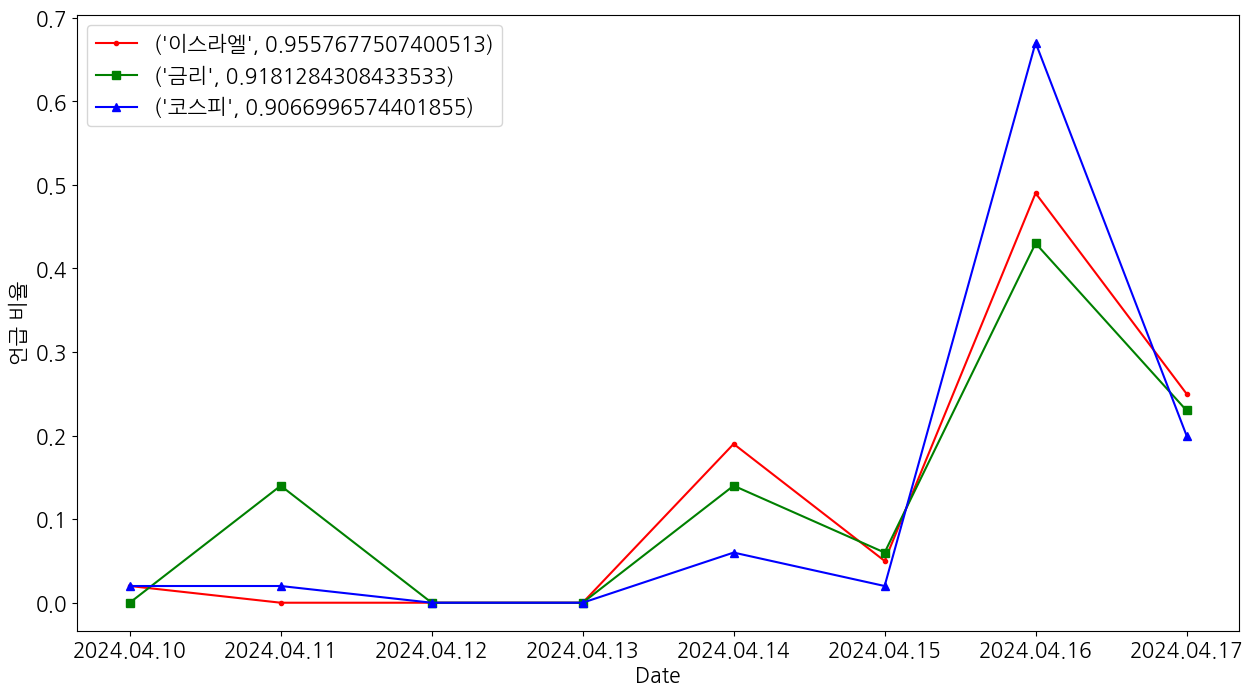

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumGothic', size=15)
fig = plt.figure(figsize=(15,8))

y1 = [m[0] for m in mentions]
y2 = [m[1] for m in mentions]
y3 = [m[2] for m in mentions]
x = date_df.index

plt.plot(x, y1, 'r.-', label=choice_word[0])
plt.plot(x, y2, 'gs-', label=choice_word[1])
plt.plot(x, y3, 'b^-', label=choice_word[2])
plt.xlabel('Date')
plt.ylabel('언급 비율')
plt.legend()
plt.show()

In [ ]:
# 관련기사 추천하기
import random
select_news = random.randint(0, len(total_df))
select_news
from sklearn.metrics.pairwise import cosine_similarity

similar = []
for i in range(len(total_df)):
    a = cosine_similarity(total_df.iloc[[select_news], 4:], total_df.iloc[[i], 4:])
    similar.append(a[0][0])
df['similar'] = similar

df.sort_values(['similar'], ascending=False, inplace=True)

df.loc[[select_news], ['date', 'title', 'url']]

,date,title,url
40,2024.04.10,삼성전자 7년간 대리점 영업비밀 수집공정위 과징금 미부과 왜,https://n.news.naver.com/mnews/article/028/000...


In [ ]:
df.iloc[:10, [0,1,3]]

,date,title,url
20,2024.04.15,2만원짜리 1만9900원에 팔면 훨씬 싸다고 느끼는 이유,https://n.news.naver.com/mnews/article/015/000...
125,2024.04.16,AI시대 삼성 디자인 철학은 사람과 공존,https://n.news.naver.com/mnews/article/009/000...
257,2024.04.15,반도체 초격차 위해 보조금 필수CPTPP 가입도 적극 추진해야,https://n.news.naver.com/mnews/article/011/000...
54,2024.04.11,레거시 반도체까지 차단사업 불확실성에 우려 심화,https://n.news.naver.com/mnews/article/277/000...
97,2024.04.16,왕좌 내준 애플대량 해고 테슬라 혁신 아이콘 흔들,https://n.news.naver.com/mnews/article/014/000...
36,2024.04.10,개관 10돌 맞은 삼성이노베이션뮤지엄,https://n.news.naver.com/mnews/article/015/000...
165,2024.04.16,AI스마트폰 생산 비중 올해 11 2027년 43,https://n.news.naver.com/mnews/article/009/000...
203,2024.04.16,유가환율 고공행진에 치솟는 제조원가 기업들 초비상,https://n.news.naver.com/mnews/article/029/000...
34,2024.04.15,재계뒷담 삼성전자 명단 요청 수용한 전삼노 조합원들은 당혹,https://n.news.naver.com/mnews/article/005/000...
177,2024.04.16,화구 경계 없는 인덕션 요리법 알려주는 오븐 삼성LG AI 빌트인으로 유럽 공략,https://n.news.naver.com/mnews/article/081/000...
